In [22]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------------------------- 51.1/51.1 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/9e/39/029c441d8af32ab423b229c4525ce5ce6707318155b59634811a4c56f5c4/shapely-2.0.2-cp311-cp311-win_amd64.whl.metadata
   

In [26]:
pip install gerrychain

In [27]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
from gerrychain import Graph
import geopandas as gpd

In [28]:
import json
from networkx.readwrite import json_graph

def read_graph_from_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return json_graph.adjacency_graph(data) 

In [30]:
#Read the KS county graph. Nodes and edges are included in .json file

filepath = 'C:\\Users\\Brayden\\DOR Files\\'
filename = 'COUNTY_KS.json'

G = Graph.from_json( filepath + filename )

In [31]:
#Print nodes

print("The Kansas county graph has this many nodes total = ", G.number_of_nodes())
print("The Kansas county graph has these nodes = ", G.nodes)

The Kansas county graph has this many nodes total =  105
The Kansas county graph has these nodes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]


In [32]:
#Print edges

print("The Kansas county graph has this many edges total = ", G.number_of_edges())
print("The Kansas county graph has these edges = ", G.edges)

The Kansas county graph has this many edges total =  263
The Kansas county graph has these edges =  [(0, 36), (0, 80), (0, 47), (1, 67), (1, 91), (1, 98), (1, 59), (1, 104), (2, 82), (2, 65), (2, 33), (2, 86), (3, 89), (3, 42), (3, 31), (3, 32), (3, 55), (3, 41), (4, 61), (4, 92), (4, 38), (4, 71), (4, 57), (4, 53), (5, 43), (5, 76), (5, 94), (5, 90), (5, 40), (5, 54), (6, 28), (6, 85), (6, 29), (6, 63), (7, 40), (7, 54), (7, 78), (8, 32), (8, 41), (9, 81), (9, 97), (9, 50), (10, 72), (10, 97), (10, 49), (10, 70), (10, 61), (10, 38), (11, 48), (11, 60), (11, 93), (11, 85), (11, 79), (12, 90), (12, 31), (12, 55), (12, 54), (13, 79), (13, 29), (13, 96), (13, 91), (14, 101), (14, 73), (14, 87), (14, 94), (14, 37), (14, 99), (15, 50), (15, 70), (15, 83), (15, 38), (15, 57), (15, 44), (15, 77), (16, 52), (16, 81), (16, 58), (16, 36), (17, 84), (17, 82), (17, 34), (17, 33), (17, 68), (18, 45), (18, 96), (18, 100), (18, 30), (18, 64), (19, 57), (19, 53), (19, 39), (19, 87), (19, 65), (19, 37)

In [52]:
#Print node # for each node, the county name, and Lat-Long coordinates

for node in G.nodes:
    county_name = G.nodes[node]['NAME10']
    
    G.nodes[node]['C_X'] = G.nodes[node]['INTPTLON10']
    G.nodes[node]['C_Y'] = G.nodes[node]['INTPTLAT10']
        
    print("Node", node, "represents", county_name, "County", ",", G.nodes[node]['C_Y'],")")

Node 0 represents Greeley County , +38.4804076 )
Node 1 represents Franklin County , +38.5580187 )
Node 2 represents Phillips County , +39.7845058 )
Node 3 represents Jackson County , +39.4109892 )
Node 4 represents Pawnee County , +38.1828730 )
Node 5 represents Clay County , +39.3449643 )
Node 6 represents Bourbon County , +37.8560997 )
Node 7 represents Republic County , +39.8289103 )
Node 8 represents Doniphan County , +39.7885021 )
Node 9 represents Seward County , +37.1805849 )
Node 10 represents Ford County , +37.6883653 )
Node 11 represents Montgomery County , +37.1895369 )
Node 12 represents Marshall County , +39.7827091 )
Node 13 represents Woodson County , +37.8884836 )
Node 14 represents Lincoln County , +39.0472763 )
Node 15 represents Finney County , +38.0498552 )
Node 16 represents Stanton County , +37.5659319 )
Node 17 represents Sheridan County , +39.3505425 )
Node 18 represents Chase County , +38.2985525 )
Node 19 represents Ellis County , +38.9145957 )
Node 20 repres

In [38]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Obtaining and storing distance
from geopy.distance import geodesic

dist = dict()
for i in G.nodes:
    for j in G.nodes:
        loc_i = ( G.nodes[i]['C_Y'],  G.nodes[i]['C_X'] )
        loc_j = ( G.nodes[j]['C_Y'],  G.nodes[j]['C_X'] )
        dist[i,j] = geodesic(loc_i,loc_j).miles


In [40]:
#Impose a deviation of 1% 
deviation = 0.01

import math
k = 4         # number of districts
total_population = sum(G.nodes[node]['TOTPOP'] for node in G.nodes)

L = math.ceil((1-deviation/2)*total_population/k)
U = math.floor((1+deviation/2)*total_population/k)
print("Using L =",L,"and U =",U,"and k =",k)

Using L = 709714 and U = 716845 and k = 4


In [41]:
# Model
m = gp.Model()

# Varibales
x = m.addVars(G.nodes, G.nodes, vtype=GRB.BINARY)  # this is creating a x[i,j] variable that is one when county i is 
                                                        # assigned to district centered at j 

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-10


In [42]:
# Minimize moment of interia 
m.setObjective( gp.quicksum( dist[i,j]*dist[i,j]*G.nodes[i]['TOTPOP']*x[i,j] for i in G.nodes for j in G.nodes), GRB.MINIMIZE )

In [43]:
# Each county is assigned to a district
m.addConstrs( gp.quicksum(x[i,j] for j in G.nodes) == 1 for i in G.nodes)

# Constraint for 4 districts
m.addConstr( gp.quicksum( x[j,j] for j in G.nodes ) == k )

# Districts are between U and L 
m.addConstrs( gp.quicksum( G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes) >= L * x[j,j] for j in G.nodes )
m.addConstrs( gp.quicksum( G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes) <= U * x[j,j] for j in G.nodes )

# If i is assigneed to j, then j is the center
m.addConstrs( x[i,j] <= x[j,j] for i in G.nodes for j in G.nodes )

m.update()

In [53]:
# Contiguity constraints
DG = nx.DiGraph(G)

# Flow varible
f = m.addVars( DG.nodes, DG.edges, vtype=GRB.CONTINUOUS)
M = DG.number_of_nodes()-1

# Node j cannot recieve a flow of its own type
m.addConstrs( gp.quicksum( f[j,u,j] for u in DG.neighbors(j) ) == 0 for j in DG.nodes )

# Node i can receive flow of type j only if i is assigned to j
m.addConstrs( gp.quicksum( f[j,u,i] for u in DG.neighbors(i)) <= M * x[i,j] for i in DG.nodes for j in DG.nodes if i != j )

# If i is assigned to j, then i should consume one unit of j flow. Otherwise, i should consume no units of j flow.
m.addConstrs( gp.quicksum( f[j,u,i] - f[j,i,u] for u in DG.neighbors(i)) == x[i,j] for i in DG.nodes for j in DG.nodes if i != j )

m.update()




# Solve model
m.Params.MIPGap = 0.0
m.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 3 2200U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 55231 rows, 121485 columns and 427976 nonzeros
Model fingerprint: 0x5ae1d9b6
Variable types: 110460 continuous, 11025 integer (11025 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+05]
  Objective range  [8e+05, 9e+10]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

MIP start from previous solve produced solution with objective 9.15957e+09 (0.37s)
Loaded MIP start from previous solve with objective 9.15957e+09

Presolve removed 22285 rows and 55803 columns (presolve time = 5s) ...
Presolve removed 22639 rows and 57104 columns (presolve time = 10s) ...
Presolve removed 22697 rows and 57276 columns
Presol

In [45]:
print("The moment of inertia objective is",m.objval)

# Retrieve the districts and their populations
centers = [j for j in G.nodes if x[j,j].x > 0.5 ]
districts = [ [i for i in G.nodes if x[i,j].x > 0.5] for j in centers]
district_counties = [ [ G.nodes[i]["NAME10"] for i in districts[j] ] for j in range(k)]
district_populations = [ sum(G.nodes[i]["TOTPOP"] for i in districts[j]) for j in range(k) ]

# Print district information
for j in range(k):
    print("District",j,"has population",district_populations[j],"and contains counties",district_counties[j])

The moment of inertia objective is 9159574459.000452
District 0 has population 714862 and contains counties ['Franklin', 'Jackson', 'Doniphan', 'Marshall', 'Wyandotte', 'Wabaunsee', 'Lyon', 'Pottawatomie', 'Atchison', 'Brown', 'Jefferson', 'Nemaha', 'Osage', 'Leavenworth', 'Shawnee', 'Douglas']
District 1 has population 712590 and contains counties ['Greeley', 'Phillips', 'Pawnee', 'Clay', 'Republic', 'Seward', 'Ford', 'Lincoln', 'Finney', 'Stanton', 'Sheridan', 'Ellis', 'Reno', 'Comanche', 'Logan', 'Norton', 'Thomas', 'Hamilton', 'Osborne', 'Hodgeman', 'Trego', 'Cloud', 'Dickinson', 'Lane', 'Cheyenne', 'Wallace', 'Kiowa', 'Haskell', 'Rice', 'Morton', 'Rush', 'Washington', 'McPherson', 'Ness', 'Grant', 'Edwards', 'Morris', 'Rooks', 'Barber', 'Decatur', 'Sherman', 'Gray', 'Barton', 'Clark', 'Saline', 'Kingman', 'Harvey', 'Geary', 'Scott', 'Jewell', 'Wichita', 'Stevens', 'Graham', 'Kearny', 'Gove', 'Smith', 'Russell', 'Rawlins', 'Riley', 'Stafford', 'Ottawa', 'Meade', 'Mitchell', 'Marion

In [46]:
# Read Kansas county shapefile 
filepath = 'C:\\Users\\Brayden\\DOR Files\\'
filename = 'KS_counties.shp'

# Read geopandas dataframe from file
df = gpd.read_file( filepath + filename )

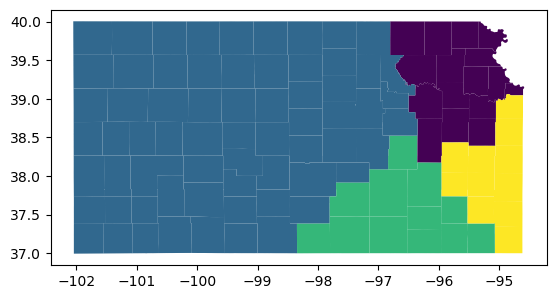

In [48]:
# What district is each county assigned to?
assignment = [ -1 for u in G.nodes ]
    
# for each district j
for j in range(len(districts)):
    
    # for each node i in given district
    for i in districts[j]:
        
        # What is its GEOID?
        geoID = G.nodes[i]["GEOID10"]
        
        # Need to find this GEOID in the dataframe
        for u in G.nodes:
            if geoID == df['GEOID10'][u]: # Found it
                assignment[u] = j # Node u from the dataframe should be assigned to district j

# Now add the assignments to a column of the dataframe and map it
df['assignment'] = assignment
my_fig = df.plot(column='assignment').get_figure()
